# Implementation of High Order Finite Elements

A starting point to NGSolve-programming, used in my finite element class.

Get repository from [github](https://github.com/TUWien-ASC/NGS-myhofe.git)

* Finite elements implement the basis functions:
  `myhoelement.hpp` and `myhoelement.cpp`

* Finite element spaces implement the enumeration of degrees of freedom, and creation of elements:
  `myhofespace.hpp` and `myhofespace.cpp`

See [Dissertation Sabine Zaglmayr](https://numa.jku.at/media/filer_public/e6/98/e6988974-e1ce-4cb2-ac0e-bcffd20350e7/phd-zaglmayr.pdf) , page 60 ff

Basis functions are based on *Legendre polynomials* $P_i$:

<img src="Legendre.png" alt="Legendre polynomials" width="300" align="center"/>

and on *Integrated Legendre polynomials* $L_{i+1}(x) := \int_{-1}^x P_i(s) ds$

<img src="IntegratedLegendre.png" alt="Legendre polynomials" width="300" align="center"/>

The integrated Legendre polynomials vanish at the boundary, and thus are useful for bubble functions.


**Basis functions for the segment:**

Vertex basis functions:

$$
\varphi_i(x) = \lambda_i(x) \qquad 0 \leq i < 2
$$

Inner basis functions (on edges), where $\lambda_s$ and $\lambda_e$ are barycentric for the start-point, and end-point of the edge:

$$
\varphi^E_i(x) = L_{i+2}(\lambda_e - \lambda_s) \qquad 0 \leq i < p-1
$$


**Basis functions for the triangle:**


Vertex basis functions:

$$
\varphi_i(x) = \lambda_i(x) \qquad 0 \leq i < 3
$$

Edge-based basis functions on the edge E, where $\lambda_s$ and $\lambda_e$ are barycentric for the start-point, and end-point of the edge:

$$
\varphi^E_i(x,y) = L_{i+2}\left(\frac{\lambda_e - \lambda_s}{\lambda_e + \lambda_s} \right) (\lambda_e+\lambda_s)^{i+2} \qquad 0 \leq i < p-1
$$

* on the edge E, there is $\lambda_s + \lambda_e = 1$, and thus the function corresponds with the integrated Legendre polynomials $L_{i+2}$.
* on the other two edges, either $\lambda_s = 0$ or $\lambda_e = 0$. Thus, the argument of $L_{i+2}$ is either $-1$, or $+1$. Thus, the shape function vanishes at the other two edges.
* The first factor is a rational function. Then we multiply with a polynomial, such that the denominator cancels out. Thus the basis functions are polynomials.

Inner basis functions (on the triangular face F):

$$
\varphi^F_{i,j}(x,y) = L_{i+2}\left(\frac{\lambda_0 - \lambda_1}{\lambda_0 + \lambda_1} \right) (\lambda_0+\lambda_1)^{i+2} 
P_j (2 \lambda_2 -1) \lambda_2 \qquad 0 \leq i,j \text{ and } i+j \leq p-3
$$


In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from myhofe import MyHighOrderFESpace

mesh = Mesh(unit_square.GenerateMesh(maxh=0.2, quad_dominated=False))

Loading myhofe library


We can now create an instance of our own finite element space:

In [2]:
fes = MyHighOrderFESpace(mesh, order=4, dirichlet="left|bottom|top")

and use it within NGSolve such as the builtin finite element spaces:

In [3]:
print ("ndof = ", fes.ndof)

ndof =  489


In [4]:
gfu = GridFunction(fes)
gfu.Set(x*x*y*y)

Draw (gfu)
Draw (grad(gfu)[0], mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

and solve the standard problem:

In [5]:
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
f = LinearForm(10*v*dx).Assemble()
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
Draw (gfu, order=3);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [6]:
errlist = []
for p in range(1,13):
    fes = MyHighOrderFESpace(mesh, order=p)
    func = sin(pi*x)*sin(pi*y)
    gfu = GridFunction(fes)
    gfu.Set(func)
    err = sqrt(Integrate( (func-gfu)**2, mesh, order=5+2*p))
    errlist.append((p,err))
print (errlist)

[(1, 0.01847055901539437), (2, 0.001602867737861007), (3, 0.00011616801306623018), (4, 5.80381522697493e-06), (5, 4.056875367007684e-07), (6, 1.048343875462942e-08), (7, 7.453640290725862e-10), (8, 1.2043500423808693e-11), (9, 8.774042421818231e-13), (10, 2.719534046832653e-13), (11, 5.762636757076888e-13), (12, 1.2327308722814043e-12)]


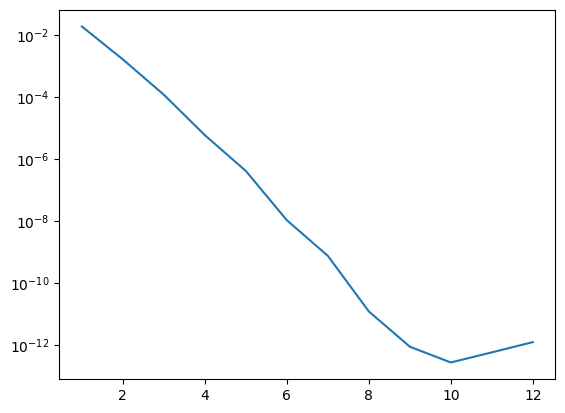

In [7]:
import matplotlib.pyplot as plt
n,err = zip(*errlist)
plt.yscale('log')
plt.plot(n,err);

**Exercises:**

Extend MyHighOrderFESpace by high order quadrilateral elements.